# Star Classification

Within this notebook I will be attempting to recreate the HR-diagram for star classification and train a basic decision tree ML algorithm to determine a stars color and/or spectral class based on the temperature, luminosity, and/or absolute magitude

#### First we import all the necessary packages and tools that will be use

In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import plotly.express as px

import matplotlib.pyplot as plt

#plt.style.available
plt.style.use('dark_background')

First we are going to import the data and make sure that we imported it correctly

In [4]:
df = pd.read_csv('6_class.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


Next we are going to see if we need to clean up the data at all, meaning we will check for null values and/or any other problems.

In [5]:
df.isnull().sum() #here we can see that our data has no problems with it so there is no need to change anything

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Now we need to split our data into the necessary columns for making the different predictions

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Radius(R/Ro)', 'Star type', 'Star color', 'Spectral Class']) #here is the data that we will use to make our predictions
X2 = df.drop(columns=['Radius(R/Ro)', 'Star type', 'Star color', 'Spectral Class', 'Absolute magnitude(Mv)'])
Y = df['Spectral Class'] #here is the data that we will classify our predictions onto
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2) #here we are splitting our data X and Y for testing and training our model for accuracy. We split in by 30%, that being 70% is for training and 30% is for testing
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=.2)

Next we are going to be importing our model which will be a Decision Tree and a KNeighbors Classifier. We will then train our models off of the train data from before, and for the KNeighbors vary the number of neighbors from 1-4

In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


n_neighbors = 1
model2 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
model2.fit(X2_train, y2_train)

n_neighbors = 2
model3 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
model3.fit(X2_train, y2_train)

n_neighbors = 3
model4 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
model4.fit(X2_train, y2_train)

n_neighbors = 4
model5 = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
model5.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=4)

Here we import the method "accuracy_score" to measure the accuracy of the predictions (test data).

In [8]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
print("Our first model has a accuracy of {:.1f}%".format(score*100))

predictions2 = model2.predict(X2_test)
score2 = accuracy_score(y2_test, predictions2)
print("Our second model has a accuracy of {:.1f}% with n_neighbors of {}".format(score2*100, 1))


predictions3 = model3.predict(X2_test)
score3 = accuracy_score(y2_test, predictions3)
print("Our second model has a accuracy of {:.1f}% with n_neighbors of {}".format(score3*100, 2))

predictions4 = model4.predict(X2_test)
score4 = accuracy_score(y2_test, predictions4)
print("Our second model has a accuracy of {:.1f}% with n_neighbors of {}".format(score4*100, 3))

predictions5 = model5.predict(X2_test)
score5 = accuracy_score(y2_test, predictions5)
print("Our second model has a accuracy of {:.1f}% with n_neighbors of {}".format(score5*100, 4))


print("\n We can see that the decision tree is better than the kneighbors model, even after we increase the number of neighbors to consider. Thus we might conclude that the decision tree is the superior model for this classification situation.")


Our first model has a accuracy of 87.5%
Our second model has a accuracy of 85.4% with n_neighbors of 1
Our second model has a accuracy of 87.5% with n_neighbors of 2
Our second model has a accuracy of 83.3% with n_neighbors of 3
Our second model has a accuracy of 85.4% with n_neighbors of 4

 We can see that the decision tree is better than the kneighbors model, even after we increase the number of neighbors to consider. Thus we might conclude that the decision tree is the superior model for this classification situation.


### HR-Diagram
Next I am going to be plotting the different values and try to recreate the HR-diagram

In [9]:
Temp = np.array(df['Temperature (K)'])
Lum = df['Luminosity(L/Lo)']
Mag = np.array(df['Absolute magnitude(Mv)'])

In [10]:
np.log10(Temp.max())

4.6020599913279625

In [11]:
color_grad = np.logspace(0, np.log10(Temp.max()), base=10, num=len(Temp))
color_grad

array([1.00000000e+00, 1.04533497e+00, 1.09272521e+00, 1.14226388e+00,
       1.19404838e+00, 1.24818054e+00, 1.30476677e+00, 1.36391834e+00,
       1.42575154e+00, 1.49038795e+00, 1.55795465e+00, 1.62858448e+00,
       1.70241632e+00, 1.77959532e+00, 1.86027323e+00, 1.94460867e+00,
       2.03276745e+00, 2.12492291e+00, 2.22125624e+00, 2.32195683e+00,
       2.42722269e+00, 2.53726077e+00, 2.65228742e+00, 2.77252880e+00,
       2.89822132e+00, 3.02961211e+00, 3.16695950e+00, 3.31053353e+00,
       3.46061648e+00, 3.61750344e+00, 3.78150287e+00, 3.95293720e+00,
       4.13214351e+00, 4.31947413e+00, 4.51529738e+00, 4.71999827e+00,
       4.93397927e+00, 5.15766110e+00, 5.39148353e+00, 5.63590630e+00,
       5.89140997e+00, 6.15849689e+00, 6.43769219e+00, 6.72954480e+00,
       7.03462854e+00, 7.35354325e+00, 7.68691595e+00, 8.03540208e+00,
       8.39968683e+00, 8.78048642e+00, 9.17854955e+00, 9.59465886e+00,
       1.00296325e+01, 1.04843256e+01, 1.09596322e+01, 1.14564869e+01,
      

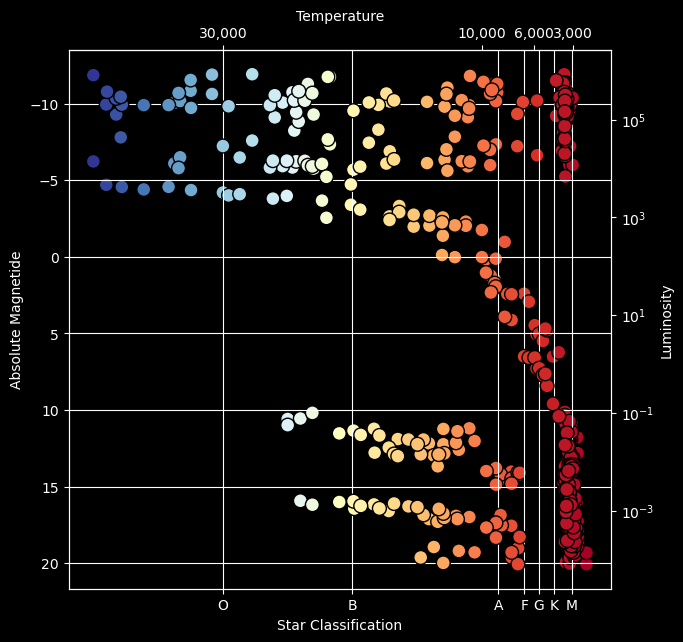

In [12]:
fig = plt.figure(figsize=(7, 7))
ax= fig.add_subplot()
cm = plt.cm.get_cmap('RdYlBu')



ax.scatter(Temp, Mag, c=Temp, cmap=cm, s=100, edgecolors='black')
#ax.set_yscale('log')
ax.invert_xaxis()
ax.invert_yaxis()
ax.grid()
ax.set_xlabel('Star Classification')
ax.set_ylabel('Absolute Magnetide')
#ax.set_xscale('log', base=10)
ax.set_xscale('linear')
ax.set_xticks([30000, (30000+10000)/2, (7500+10000)/2, (6000+7500)/2, (6000+5200)/2, (5200+3700)/2, (2400+3700)/2])
ax.set_xticklabels(['O', 'B', "A", "F", "G", "K", "M"])



secax = ax.secondary_xaxis('top')
secax.set_xticks([30000, 10000, 6000, 3000])
secax.set_xticklabels(['30,000', '10,000', '6,000', '3,000'])
secax.set_xlabel('Temperature')




ax2 = ax.twinx()
ax2.scatter(Temp, Lum, c=Temp, cmap=cm,  s=100, edgecolors='black')
ax2.set_ylabel('Luminosity')
ax2.set_yscale('log')


In [13]:
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [17]:
fig = px.scatter(df, x='Temperature (K)', y='Luminosity(L/Lo)', hover_name='Spectral Class', log_x=True, log_y=True, color='Temperature (K)', ``)
fig['layout']['xaxis']['autorange'] = "reversed"
fig.show()